## Data loading

### Subtask:
Load the "vgsales.csv" dataset into a Pandas DataFrame.


**Reasoning**:
Load the "vgsales.csv" dataset into a Pandas DataFrame using `pd.read_csv()`.



In [1]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
display(df.head())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Explore the dataset's structure and characteristics by examining its shape, data types, descriptive statistics, missing values, unique values, and the distribution of sales.



In [2]:
# 1. Shape of the Data
print("Shape of the DataFrame:", df.shape)

# 2. Data Types
print("\nData Types of Columns:\n", df.dtypes)

# 3. Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:\n", df.describe())

# 4. Missing Values
print("\nMissing Values per Column:\n", df.isnull().sum())

# 5. Unique Values for Categorical Columns
print("\nUnique Platforms:", df['Platform'].nunique())
print("Unique Genres:", df['Genre'].nunique())
print("Unique Publishers:", df['Publisher'].nunique())

# 6. Distribution of Sales across Regions
print("\nDistribution of Sales across Regions:")
print(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe())

Shape of the DataFrame: (16598, 11)

Data Types of Columns:
 Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Descriptive Statistics for Numerical Columns:
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.11000

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Handle missing values in the "Year" and "Publisher" columns based on the exploration results. We will fill missing "Year" with the median year and fill missing "Publisher" with "Unknown".



In [3]:
# Fill missing 'Year' with the median year
median_year = df['Year'].median()
df['Year'].fillna(median_year, inplace=True)

# Fill missing 'Publisher' with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)

# Verify missing values again
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


<ipython-input-3-418cf9f2fd63>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(median_year, inplace=True)
<ipython-input-3-418cf9f2fd63>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

**Reasoning**:
Handle outliers in the sales columns using box plots and IQR to identify and cap them.



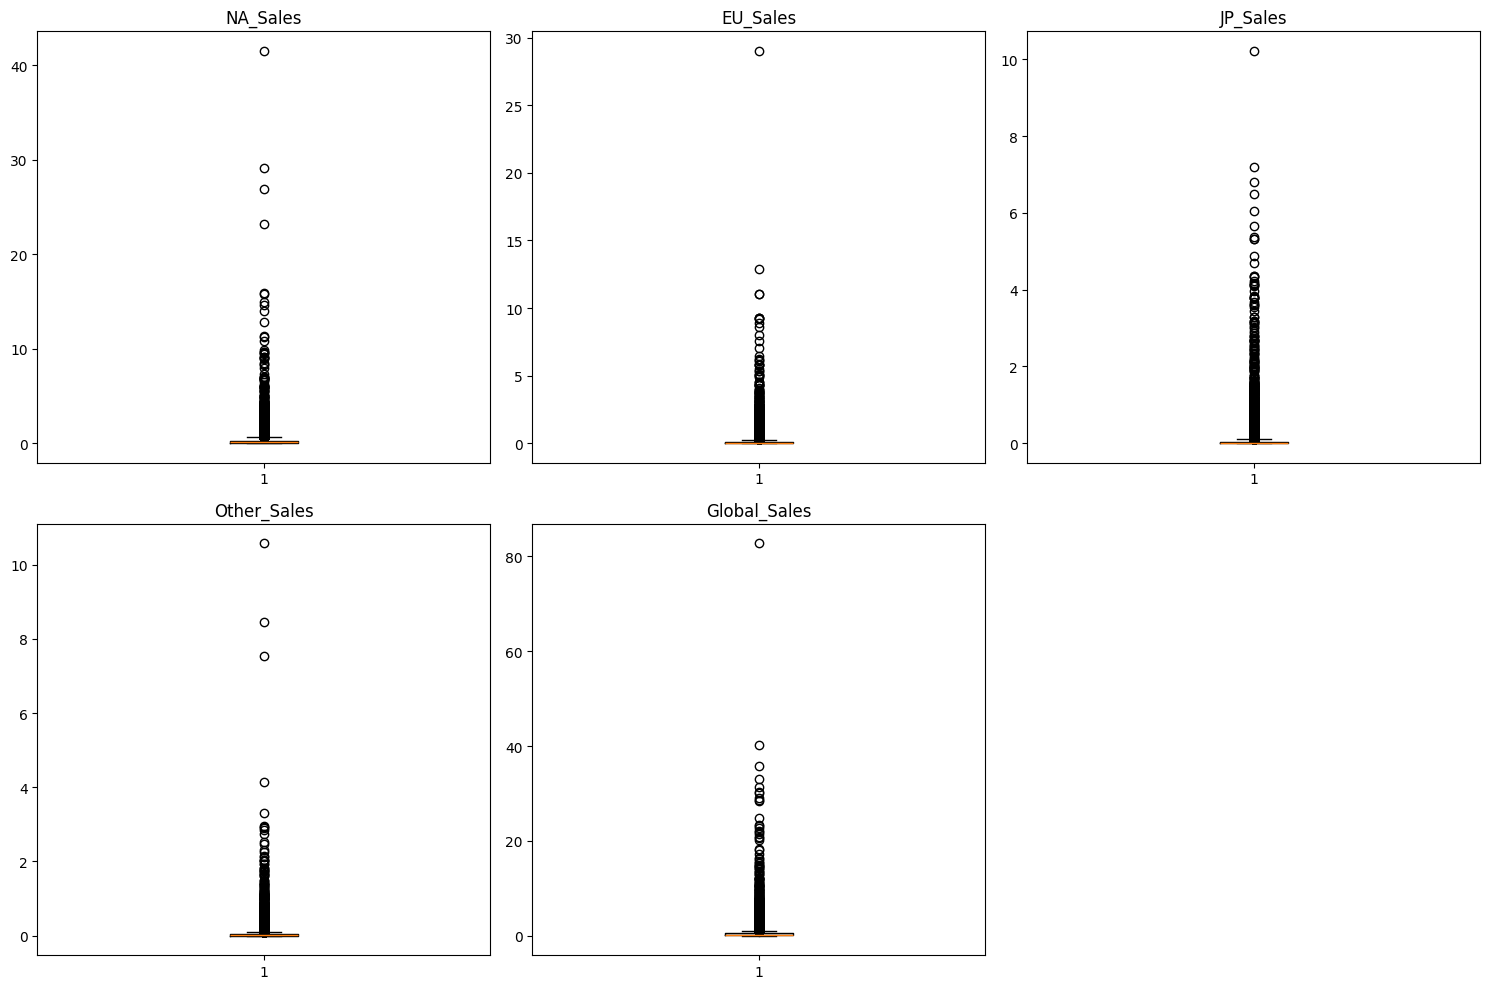

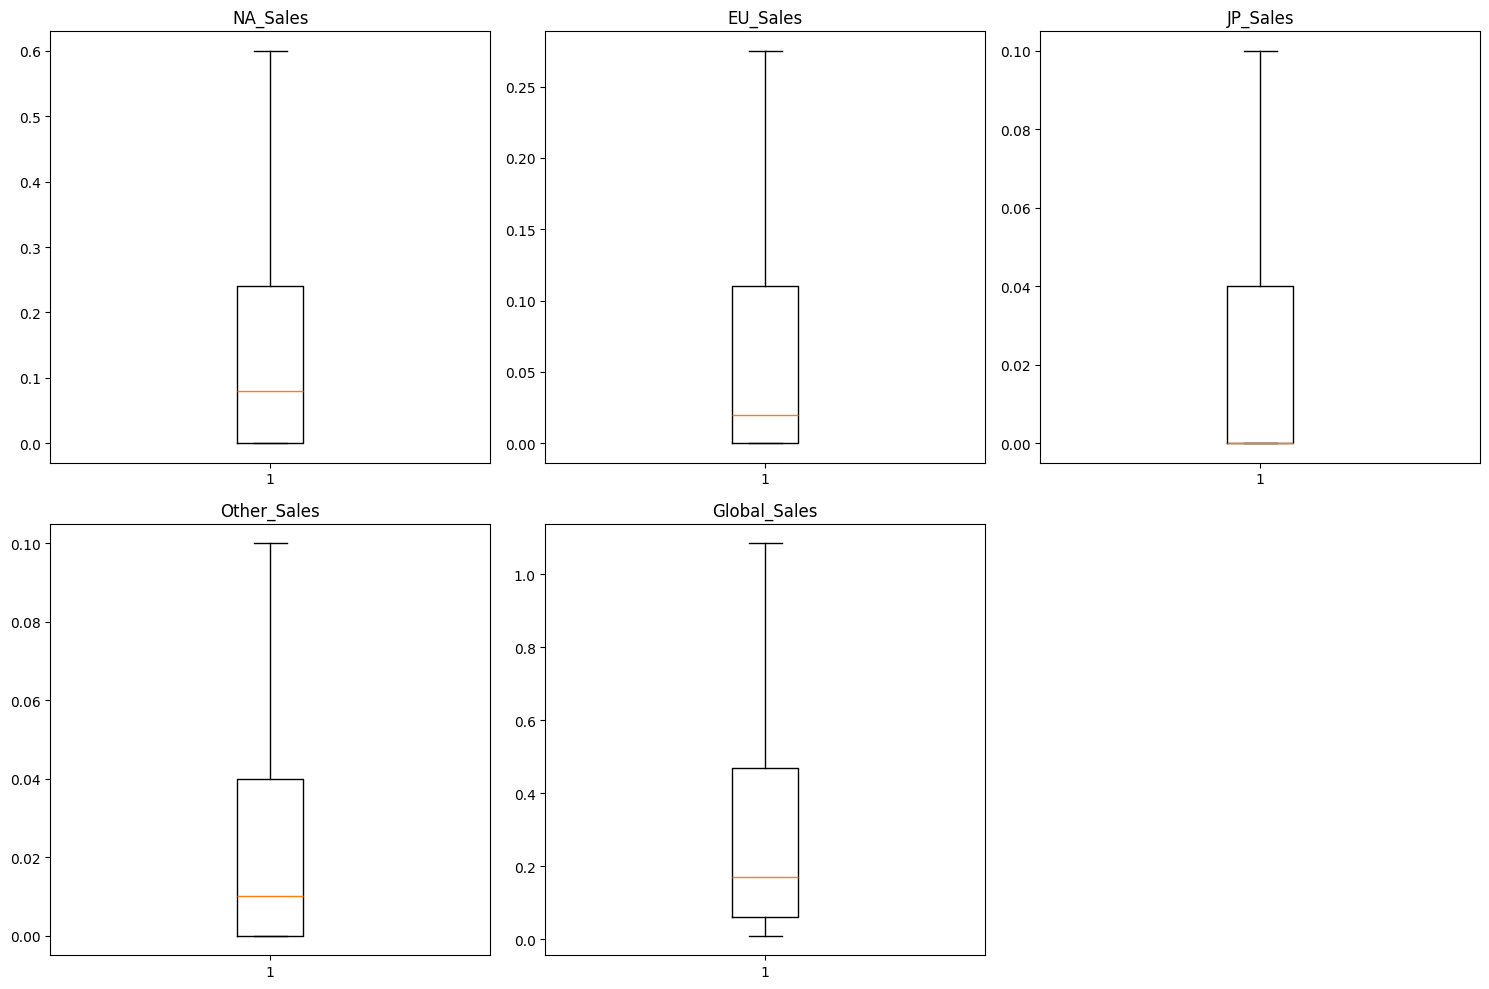

In [4]:
import matplotlib.pyplot as plt

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

plt.figure(figsize=(15, 10))
for i, column in enumerate(sales_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Calculate IQR and identify outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

for column in sales_columns:
    df = handle_outliers_iqr(df, column)

# Check the distribution after capping outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(sales_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the cleaned dataset to answer the following questions:


**Reasoning**:
Analyze the dataset to answer the questions about platform, genre, publisher, region sales, and the correlation between critic score and sales.



In [6]:
# 1. Which platform has the highest total sales?
platform_sales = df.groupby('Platform')['Global_Sales'].sum()
highest_sales_platform = platform_sales.idxmax()
print(f"The platform with the highest total sales is: {highest_sales_platform}")

# 2. Which genre is the most popular?
genre_game_count = df.groupby('Genre')['Name'].count()
most_popular_genre_count = genre_game_count.idxmax()
genre_total_sales = df.groupby('Genre')['Global_Sales'].sum()
most_popular_genre_sales = genre_total_sales.idxmax()
print(f"The genre with the highest number of games released is: {most_popular_genre_count}")
print(f"The genre with the highest total sales is: {most_popular_genre_sales}")

# 3. Which publisher has released the most games?
publisher_game_count = df.groupby('Publisher')['Name'].count()
most_games_publisher = publisher_game_count.idxmax()
print(f"The publisher with the most released games is: {most_games_publisher}")

# 4. Which region has the highest sales?
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
highest_sales_region = region_sales.idxmax()
print(f"The region with the highest total sales is: {highest_sales_region}")

# 5. Is there a correlation between critic score and sales?
if 'Critic_Score' in df.columns:
    correlation = df['Critic_Score'].corr(df['Global_Sales'])
    print(f"The correlation between Critic Score and Global Sales is: {correlation}")
else:
    print("Critic Score column is not found in the dataset. Cannot calculate the correlation.")

The platform with the highest total sales is: PS2
The genre with the highest number of games released is: Action
The genre with the highest total sales is: Action
The publisher with the most released games is: Electronic Arts
The region with the highest total sales is: NA_Sales
Critic Score column is not found in the dataset. Cannot calculate the correlation.


## Data visualization

### Subtask:
Visualize the key findings from the data analysis using appropriate charts.


**Reasoning**:
Visualize the key findings from the data analysis using appropriate charts, starting with platform with highest total sales.



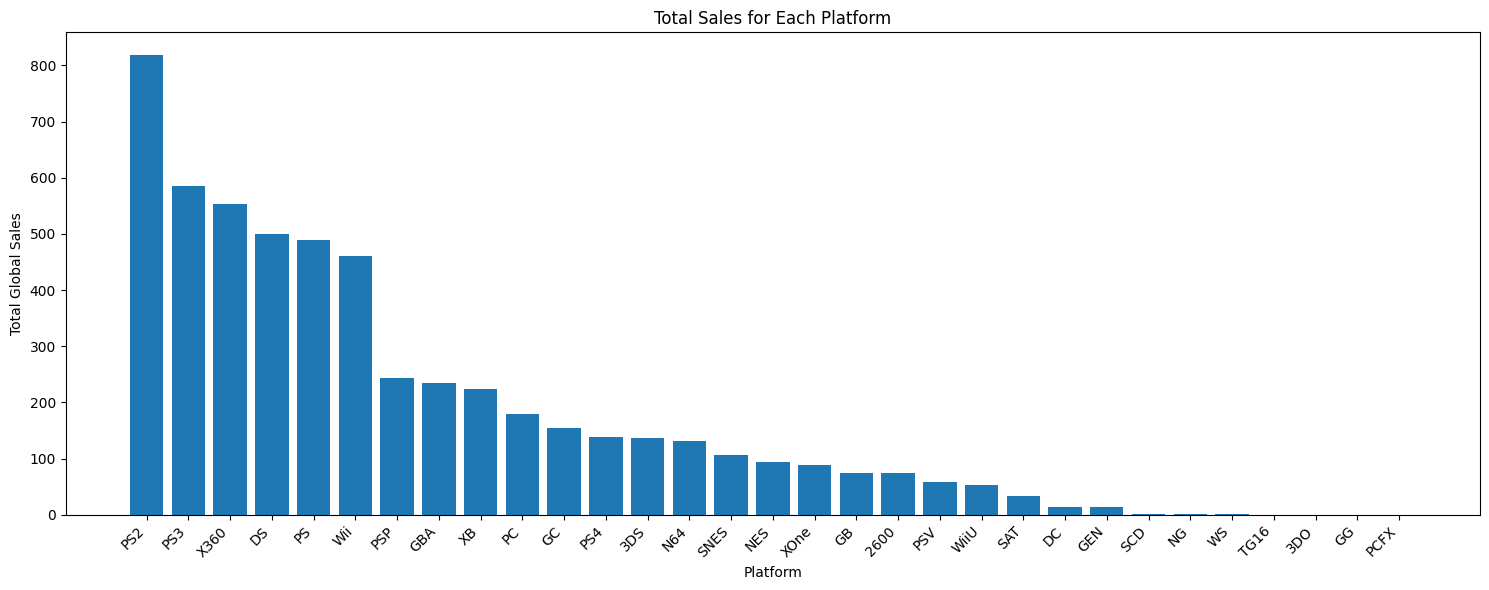

In [7]:
import matplotlib.pyplot as plt

# 1. Platform with Highest Total Sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(platform_sales.index, platform_sales.values)
plt.xlabel('Platform')
plt.ylabel('Total Global Sales')
plt.title('Total Sales for Each Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the most popular genre by both count and total sales.



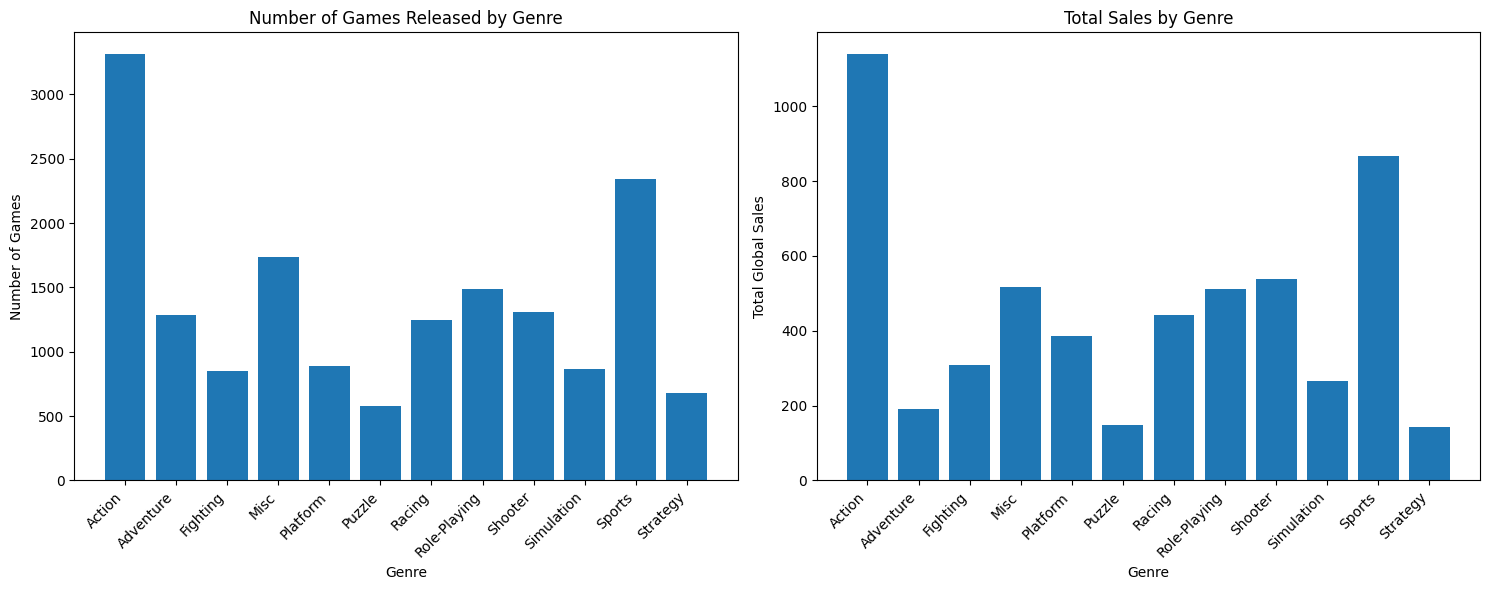

In [8]:
import matplotlib.pyplot as plt

# 2. Most Popular Genre
genre_game_count = df.groupby('Genre')['Name'].count()
genre_total_sales = df.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(genre_game_count.index, genre_game_count.values)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games Released by Genre')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(genre_total_sales.index, genre_total_sales.values)
plt.xlabel('Genre')
plt.ylabel('Total Global Sales')
plt.title('Total Sales by Genre')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the publisher with most games released.



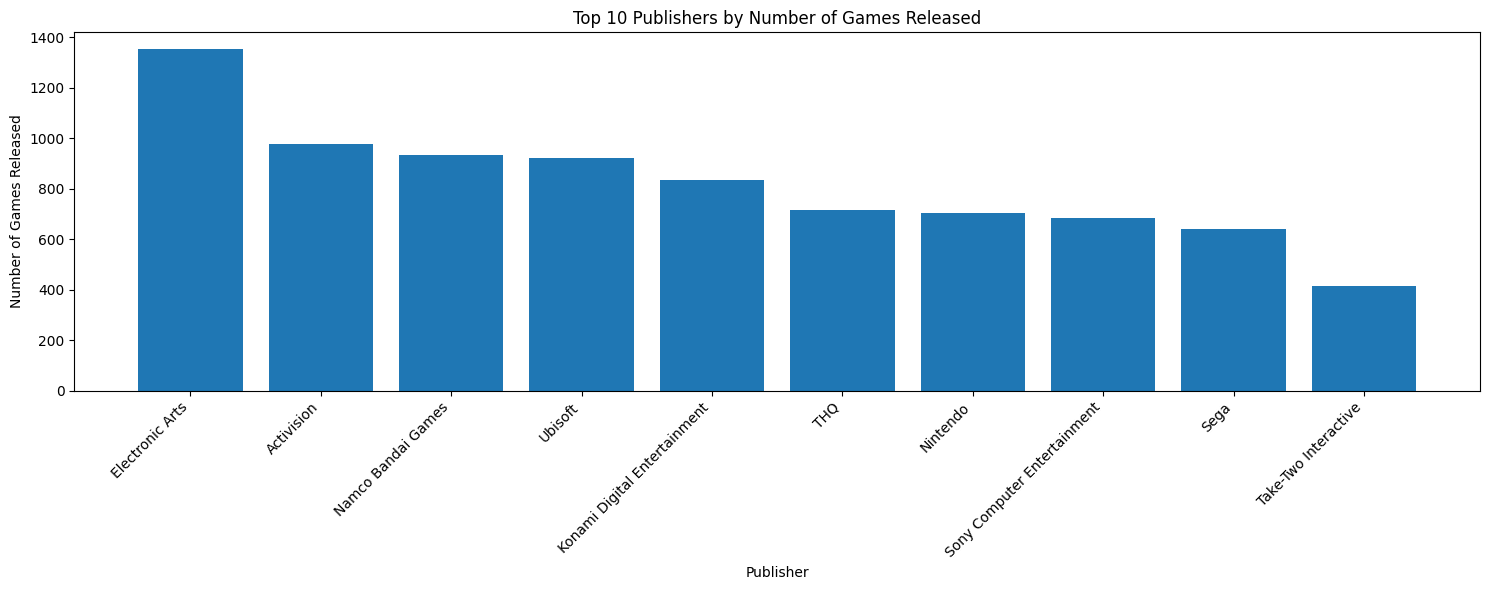

In [9]:
import matplotlib.pyplot as plt

# 3. Publisher with Most Games Released
publisher_game_count = df.groupby('Publisher')['Name'].count().sort_values(ascending=False)
top_10_publishers = publisher_game_count[:10]

plt.figure(figsize=(15, 6))
plt.bar(top_10_publishers.index, top_10_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Games Released')
plt.title('Top 10 Publishers by Number of Games Released')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the proportion of total sales in each region using a pie chart.



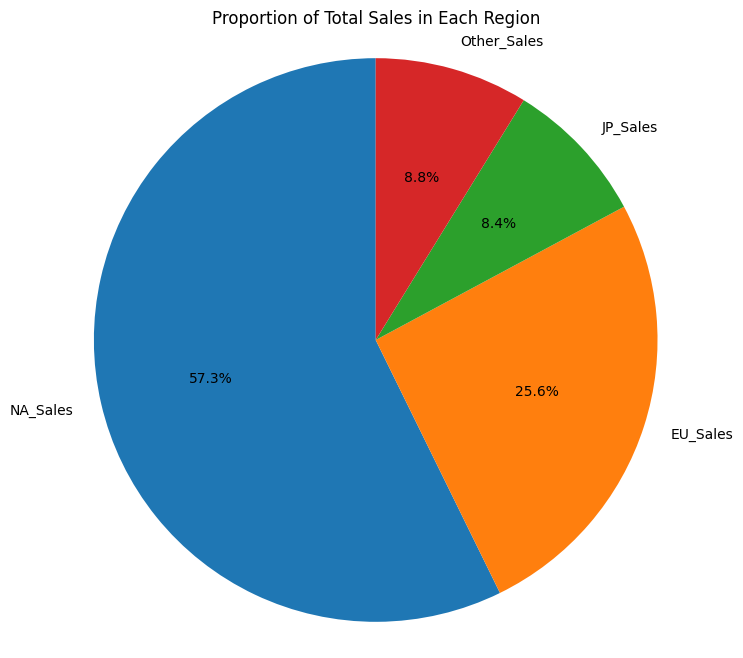

In [10]:
import matplotlib.pyplot as plt

# 4. Region with Highest Sales
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Sales in Each Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Summary:

## Video Game Sales Data Analysis Summary

### 1. Q&A

* **Which platform has the highest total sales?** PS2.
* **Which genre is the most popular?** Action, both in terms of game count and total sales.
* **Which publisher has released the most games?** Electronic Arts.
* **Which region has the highest sales?** North America (NA_Sales).
* **Is there a correlation between critic score and sales?**  Could not be calculated as the 'Critic_Score' column was not present in the dataset.


### 2. Data Analysis Key Findings

* **PS2 dominated the market:** PS2 had the highest total global sales among all platforms.
* **Action genre was the most successful:** The Action genre had the highest number of games released and the highest total sales.
* **Electronic Arts was the most prolific publisher:** Electronic Arts released the most games in the dataset.
* **North America led in video game sales:** North America had the highest total sales across all regions, representing a significant portion of the global video game market.


### 3. Insights or Next Steps

* **Focus on popular platforms and genres:** Future game development and marketing efforts could prioritize platforms and genres that have historically shown high sales, such as PS2 and Action.
* **Explore potential correlations:**  Obtain data on critic scores and user ratings to investigate the relationship between critical reception and sales performance. This could provide valuable insights for game developers and publishers.
